In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

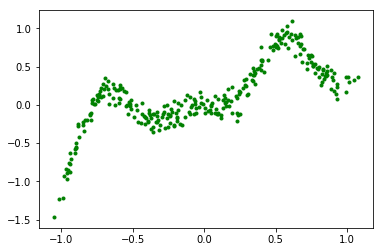

In [11]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - x.mean() # good practice to zero-center x in linear mapping
x = x*2
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [277]:
hidden_size = 3

optimizer = tnn.Adam(learning_rate=0.01)
layer1 = tnn.LinearLayer(1, hidden_size, optimizer=optimizer)
layer2=tnn.Relu()
# activation=ReluMasked1()
layer3 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net = tnn.AutoForm([layer1, layer2, layer3])

_______________________
epoch 0
Loss 0.18292719377565447


_______________________
epoch 100
Loss 0.04435887034027648


_______________________
epoch 200
Loss 0.04136092457868492


_______________________
epoch 300
Loss 0.04108374483458204


_______________________
epoch 400
Loss 0.041066728705073885


_______________________
epoch 500
Loss 0.041059699257631505


_______________________
epoch 600
Loss 0.041047605298374264


_______________________
epoch 700
Loss 0.04101648497181469


_______________________
epoch 800
Loss 0.04090278355114244


_______________________
epoch 900
Loss 0.03988870683693151


_______________________
epoch 1000
Loss 0.03775062183054811


_______________________
epoch 1100
Loss 0.03485731754982165


_______________________
epoch 1200
Loss 0.03129662883532105


_______________________
epoch 1300
Loss 0.02801538430834557


_______________________
epoch 1400
Loss 0.025851866619923558


_______________________
epoch 1500
Loss 0.024814178710311652


_______________

TclError: invalid command name "pyimage537"

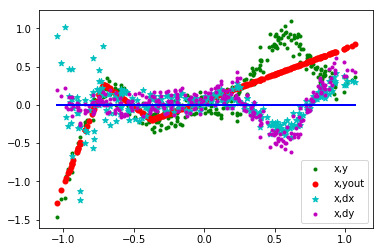

In [278]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    yout = net.forward(xx)
    loss = tnn.MseLoss.loss(yout, yy)
    dy = tnn.MseLoss.del_loss(yout, yy)
    
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [281]:
print("Loss ",loss)
print("Weight 1", '\n', layer1.weights)
print("Weight 2", '\n', layer3.weights)

Loss  0.023074995584962878
Weight 1 
 [[-2.84120384 -0.79526336  1.15985234]]
Weight 2 
 [[-2.13190471]
 [ 1.72047348]
 [ 1.76463662]]


In [282]:
# net.layerList[1] = tnn.Relu()
# net.layerList[1] = ReluMasked1()

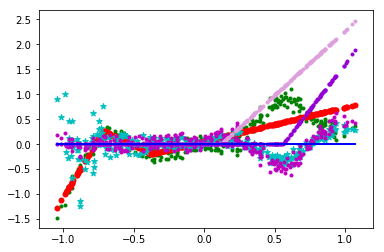

In [283]:
%matplotlib inline        
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
#         plt.scatter(x, dxtrue.reshape(-1), marker='+', c='teal', lw=1, label='x,dxtrue')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(la2a.input.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)

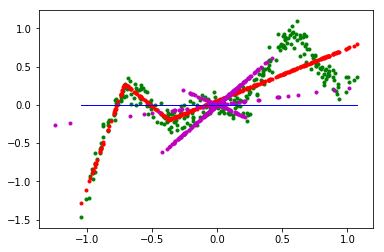

In [284]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=1, label='x,a2')
# plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')

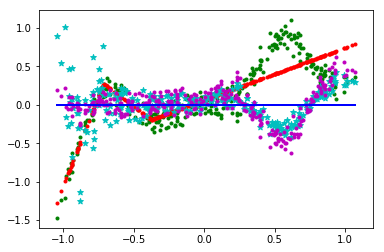

In [285]:
%matplotlib inline
plt.plot(x, np.zeros_like(x), c='b', lw=2)
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=1, label='x,a2')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')

### Using this refined x-residual to predict the output if changed such

In [317]:
xx_ = xx

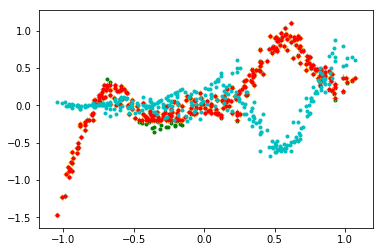

In [333]:
for i in range(20):
    yout = net.forward(xx_)
    dy = tnn.MseLoss.del_loss(yout, yy)
    dx_ = net.backward(dy)

    xx_ = xx_ - 0.1*dx_/hidden_size
    yout_ = net.forward(xx_)

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='+', c='orange', lw=1, label='x,y_out')
plt.scatter(x, yout_.reshape(-1), marker='.', c='r', lw=1, label='x,y_out_')
plt.scatter(x, (xx-xx_).reshape(-1), marker='.', c='c', lw=1, label='x,dx_')
# plt.scatter(x, (dx_).reshape(-1), marker='.', c='b', lw=1, label='x,dx')


# plt.xlim((-0.5, 0.5))
# plt.ylim((-1.5, 1.5))

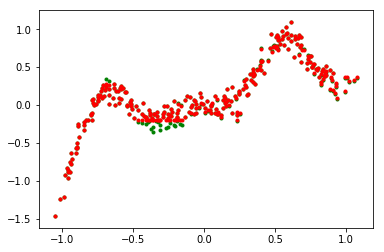

In [334]:
xxgrad = xx-xx_
yout_ = net.forward(xx-xxgrad)
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout_.reshape(-1), marker='.', c='r', lw=1, label='x,y_out_')

## Improving on it by predicting the xx gradient

In [335]:
hidden_size = 4

optimizer = tnn.Adam(learning_rate=0.01)
layer1 = tnn.LinearLayer(1, hidden_size, optimizer=optimizer)
layer2 = tnn.Relu()
# activation=ReluMasked1()
layer3 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net1 = tnn.AutoForm([layer1, layer2, layer3])

_______________________
epoch 0
Loss 0.5797316121624994


_______________________
epoch 100
Loss 0.03789424784556289


_______________________
epoch 200
Loss 0.02995265994108698


_______________________
epoch 300
Loss 0.02883435764459651


_______________________
epoch 400
Loss 0.027875886178402944


_______________________
epoch 500
Loss 0.02689911305395824


_______________________
epoch 600
Loss 0.025992687386790926


_______________________
epoch 700
Loss 0.024883890603238194


_______________________
epoch 800
Loss 0.015210849609744725


_______________________
epoch 900
Loss 0.012060186191058524


_______________________
epoch 1000
Loss 0.010506862791267441


_______________________
epoch 1100
Loss 0.00942304812188269


_______________________
epoch 1200
Loss 0.008675368564920476


_______________________
epoch 1300
Loss 0.008153926918580962


_______________________
epoch 1400
Loss 0.00778360714353181


_______________________
epoch 1500
Loss 0.00751096299591788


_____________

TclError: invalid command name "pyimage582"

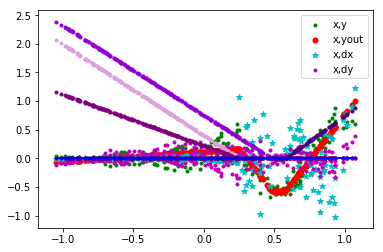

In [336]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    yout = net1.forward(xx)
    loss = tnn.MseLoss.loss(yout, xxgrad)
    dy = tnn.MseLoss.del_loss(yout, xxgrad)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, xxgrad.reshape(-1), marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(layer3.input.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

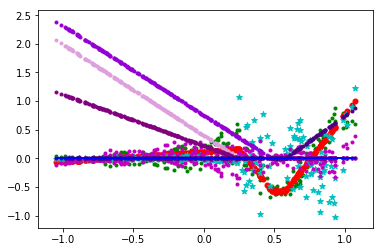

In [337]:
%matplotlib inline
plt.scatter(x, xxgrad.reshape(-1), marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(layer3.input.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)


In [338]:
yout0 = xx-net1.forward(xx)
yout1 = net.forward(yout0)
tnn.MseLoss.loss(yout1, yy)

0.008573928927551907

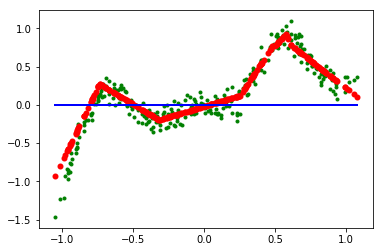

In [339]:
%matplotlib inline        
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout1.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

### Using this type of gradient in Multilayer Neural Network

In [341]:
hidden_size = 3
actf = tnn.Relu
# actf = ReluMasked1

optimizer = tnn.Adam(learning_rate=0.003)
layer1 = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.NonLinearLayer(hidden_size, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer3 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

net = tnn.AutoForm([layer1, layer2, layer3])

_______________________
epoch 0
Loss 0.06781313713320594


_______________________
epoch 10
Loss 0.05041497147536098


_______________________
epoch 20
Loss 0.04864215074402975


_______________________
epoch 30
Loss 0.046693537472881165


_______________________
epoch 40
Loss 0.045488128436530474


_______________________
epoch 50
Loss 0.044862392134123075


_______________________
epoch 60
Loss 0.04447544164965309


_______________________
epoch 70
Loss 0.04392883002750274


_______________________
epoch 80
Loss 0.043480583573801364


_______________________
epoch 90
Loss 0.04303743107817615


_______________________
epoch 100
Loss 0.04249728174863124


_______________________
epoch 110
Loss 0.04165342647510582


_______________________
epoch 120
Loss 0.04079481139456884


_______________________
epoch 130
Loss 0.03988665105665641


_______________________
epoch 140
Loss 0.03900192093013568


_______________________
epoch 150
Loss 0.03816378956791546


_______________________
epoch 1

_______________________
epoch 1340
Loss 0.039246981661121685


_______________________
epoch 1350
Loss 0.03929927654015273


_______________________
epoch 1360
Loss 0.0393280685915215


_______________________
epoch 1370
Loss 0.039337041187469855


_______________________
epoch 1380
Loss 0.039341455785915545


_______________________
epoch 1390
Loss 0.03934797765796233


_______________________
epoch 1400
Loss 0.039357628894165636


_______________________
epoch 1410
Loss 0.03936975876599095


_______________________
epoch 1420
Loss 0.03938164124203269


_______________________
epoch 1430
Loss 0.039409707728685794


_______________________
epoch 1440
Loss 0.03947409284256573


_______________________
epoch 1450
Loss 0.03951952086499583


_______________________
epoch 1460
Loss 0.03953632035380108


_______________________
epoch 1470
Loss 0.03953893067553718


_______________________
epoch 1480
Loss 0.0395403545730401


_______________________
epoch 1490
Loss 0.039546840196561676


____

_______________________
epoch 2660
Loss 0.04017663282501769


_______________________
epoch 2670
Loss 0.04017611679181306


_______________________
epoch 2680
Loss 0.04016752946178541


_______________________
epoch 2690
Loss 0.04015763754299433


_______________________
epoch 2700
Loss 0.04015321992232819


_______________________
epoch 2710
Loss 0.0401476785477231


_______________________
epoch 2720
Loss 0.04014166235271068


_______________________
epoch 2730
Loss 0.040134911418444906


_______________________
epoch 2740
Loss 0.04012830346937959


_______________________
epoch 2750
Loss 0.040121873755362254


_______________________
epoch 2760
Loss 0.04011513269480676


_______________________
epoch 2770
Loss 0.04010826440754482


_______________________
epoch 2780
Loss 0.04010124417727789


_______________________
epoch 2790
Loss 0.04009412954954429


_______________________
epoch 2800
Loss 0.0400868893205886


_______________________
epoch 2810
Loss 0.04007950649873795


________

TclError: invalid command name "pyimage611"

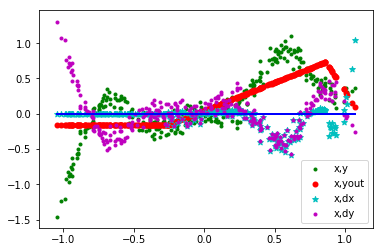

In [343]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = layer1.forward(xx)
    a2 = layer2.forward(a1)
    yout = layer3.forward(a2)
    
    loss = tnn.MseLoss.loss(yout, yy)
    dy = tnn.MseLoss.del_loss(yout, yy)
    
    da2 = layer3.backward(dy)
    layer3.update()
    a2_ = a2
    for i in range(200):
        yout_ = layer3.forward(a2_)
        dy_ = tnn.MseLoss.del_loss(yout_, yy)
        da2_ = layer3.backward(dy)

        a2_ = a2_ - 0.1*da2_/hidden_size
    da2 = a2 - a2_
    
    da1 = layer2.backward(da2)
    layer2.update()
    a2 = a2_
    a1_ = a1
    for i in range(200):
        a2_ = layer2.forward(a1_)
        da2_ = tnn.MseLoss.del_loss(a2_, a2)
        da1_ = layer2.backward(da2_)

        a1_ = a1_ - 0.1*da1_/hidden_size
    da1 = a1 - a1_
    
    dx = layer1.backward(da1)
    layer1.update()
    a1 = a1_
    xx_ = xx
    for i in range(200):
        a1_ = layer1.forward(xx_)
        da1_ = tnn.MseLoss.del_loss(a1_, a1)
        dx_ = layer1.backward(da1_)

        xx_ = xx_ - 0.1*dx_/hidden_size
    dx = dx - dx_
    
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

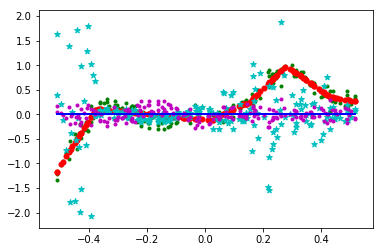

In [755]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,y_out')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)        

### Using this refined x-residual to predict the output if changed such

(-1.5, 1.5)

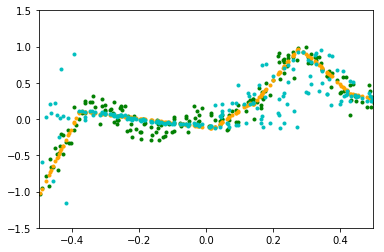

In [756]:
yout = net.forward(x_data)
dy = tnn.MseLoss.del_loss(yout, y_data)
dx = net.backward(dy)

yout_ = net.forward(x_data-dx/hidden_size)
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='orange', lw=1, label='x,y_out')
plt.scatter(x, yout_.reshape(-1), marker='.', c='c', lw=1, label='x,y_out_')
plt.xlim((-0.5, 0.5))
plt.ylim((-1.5, 1.5))

## Recursively reducing this false gradient

In [757]:
x_data_ = x_data

(-1.5, 1.5)

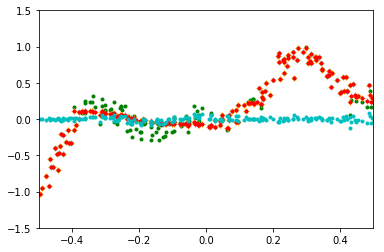

In [809]:
yout = net.forward(x_data_)
dy = tnn.MseLoss.del_loss(yout, y_data)
dx_ = net.backward(dy)

x_data_ = x_data_ - 0.03*dx_/hidden_size
yout_ = net.forward(x_data_)

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='+', c='orange', lw=1, label='x,y_out')
plt.scatter(x, yout_.reshape(-1), marker='.', c='r', lw=1, label='x,y_out_')
plt.scatter(x, (x_data-x_data_).reshape(-1), marker='.', c='c', lw=1, label='x,dx_')
# plt.scatter(x, (dx_).reshape(-1), marker='.', c='b', lw=1, label='x,dx')


plt.xlim((-0.5, 0.5))
plt.ylim((-1.5, 1.5))